In [530]:
import pandas as pd
import re
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline 

In [531]:
#have a overview
df = pd.read_csv('songs.csv')   
print(df.isnull().sum())
print(df.shape)
df.describe()
df.head()

artist          3
format        205
genre         153
length        259
producer       71
recorded      424
release         9
song            0
songwriter     15
year            0
dtype: int64
(2626, 10)


,artist,format,genre,length,producer,recorded,release,song,songwriter,year
0,The Police,"7-inch 45, ,rpm record","New wave,,,[2], ,soft rock,[3]","\n,Length,\n,4,:,13,\n","\n,\n,\n,The Police,\n,Hugh Padgham,\n,\n,\n",December 1982 – February 1983,20 May 1983,Every Breath You Take,Sting,1983
1,Van Halen,"7"",, ,CD single","Synth rock,, ,hard rock,[1]","\n,Length,\n,4,:,02,\n",Ted Templeman,"\n,\n","December 21, 1983",Jump,"\n,\n,\n,Eddie Van Halen,\n,Alex Van Halen,\n,...",1984
2,Deniece Williams,"\n,\n,\n,7"",\n,12"",\n,\n,\n","\n,\n,\n,R&B,\n,dance-pop,\n,freestyle,\n,\n,\n","\n,Length,\n,4,:,21,\n",George Duke,1983,"February 14, 1984",Let's Hear It for the Boy,"\n,\n,\n,Tom Snow,\n,Dean Pitchford,\n,\n,\n",1984
3,Billy Idol,"\n,\n,\n,7"",\n,12"",\n,\n,\n","\n,\n,\n,New wave,[1],\n,synth-pop,[2],\n,\n,\n","\n,Length,\n,4,:,58,\n4:08 (7""),\n",Keith Forsey,NaN,1984,Eyes Without a Face,"\n,\n,\n,Billy Idol,\n,Steve Stevens,\n,\n,\n",1984
4,George Michael,"\n,\n,\n,7"",\n,12"",\n,CD,\n,\n,\n,CD","\n,\n,\n,Rock and roll,\n,dance-rock,\n,\n,\n,...","\n,Length,\n,3,:,16,\n","George Michael,\n,\n,\n,Fred Durst,\n,Ross Rob...","1987,May 1997 at Indigo Ranch Studio in","12 October 1987,31 October 1998",Faith,"George Michael,George Michael",1988


In [533]:
#clean up messy data
df = df.replace('[\n],|[\n]|\[[0-9]\]|,,,','',regex=True)
df['format'].replace(',,','',regex=True,inplace=True)
df['genre'].replace(',,',',',regex=True,inplace=True)
df['length'].replace('[Length,]','',regex=True, inplace=True)
df['producer'].replace(',,,','',regex=True,inplace=True)
df['producer'].replace(',,',',',regex=True,inplace=True)
df['songwriter'].replace(',,','',regex=True,inplace=True)
df = df.loc[df.year >= 1990]
df.shape

(2030, 10)

#### Question:what kind of singers would be good aseets  for companies?

-how many genre one singer

-write song by himself

-what genre

#### 1.how long a genre or a singer can maintain popular?
-average popular yr for singer

-max yr for singer

-min yr for singer

-in one year how many songs on the list and what genre

-what kind of genre can maintain long time on board what kind last the min time

In [534]:
df_yr = df.copy()
df_yr.head()

,artist,format,genre,length,producer,recorded,release,song,songwriter,year
7,Wilson Phillips,"7"" single ,Cassette ,CD","Pop, ,pop rock, ,soft rock",4:27 (album vrsio)3:42 (sil vrsio),Glen Ballard,1989,"February 27, 1990",Hold On,"Carnie Wilson ,Chynna Phillips ,Glen Ballard",1990
8,"Paula Abdul,The Wild Pair","CD maxi,7"" single,12"" maxi,cassette,","Dance-pop,hip hop,new jack swing,",3:45,Leiber,"April 1988, Summer 1989","November 28, 1989",Opposites Attract,Oliver Leiber,1990
9,Johnny Gill,"CD single,CD maxi","New jack swing,","5:314:07 (sil vrsio)4:23 (rmix)4:03 (7"" rmix)","Jimmy Jam and Terry Lewis (album version),DJ E...","September 1989,at , Studios,","March 13, 1990",Rub You the Right Way,"James Harris III, Terry Lewis",1990
10,Luther Vandross,"Vinyl 7"" 45 RPM Single,cassette, CD Single","R&B, ,soul, ,adult contemporary",5:20,"Luther Vandross, Maksim Shajdurov",1989,September 1989,Here and Now,"David L. Elliott,Terry Steele , Julian A. Will...",1990
11,Phil Collins,"CD maxi ,7"" single ,12"" single",Soft rock,4:36,"Phil Collins, ,Hugh Padgham",NaN,"26 April 1990 (US),November 1990 (UK),1991 (Fr...",Do You Remember,Phil Collins,1990


Text(0.5,1,'Bar chart of How long can singers stay on billboard')

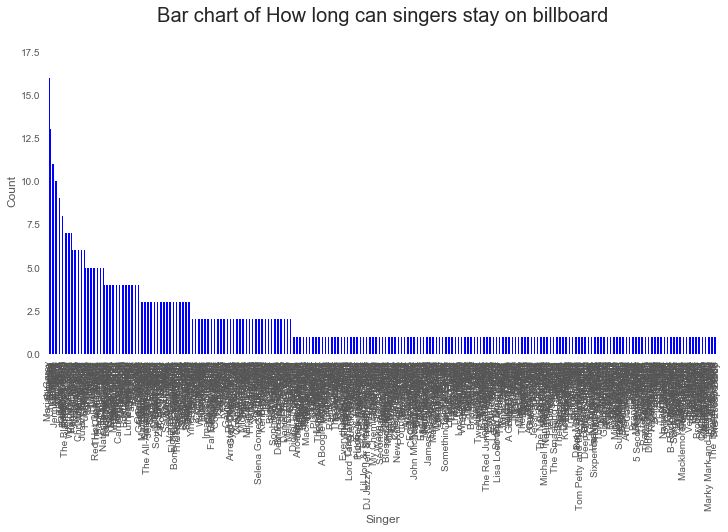

In [535]:
plt.figure(figsize=(12,6))
df_yr = df_yr.groupby(['artist','year']).count().reset_index()
df_yr['artist'] = df_yr['artist'].map(lambda i: i.split(',')[0])
df_yr['artist'].value_counts().plot.bar(color='b')
plt.xlabel('Singer')
plt.ylabel('Count')
plt.title('Bar chart of How long can singers stay on billboard', fontsize=20)

In [536]:
df_yr['artist'].value_counts().describe()

count    881.000000
mean       1.989784
std        1.985432
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       18.000000
Name: artist, dtype: float64

Text(0.5,1,'Bar chart of singers can stay on billboard for more than 7 years')

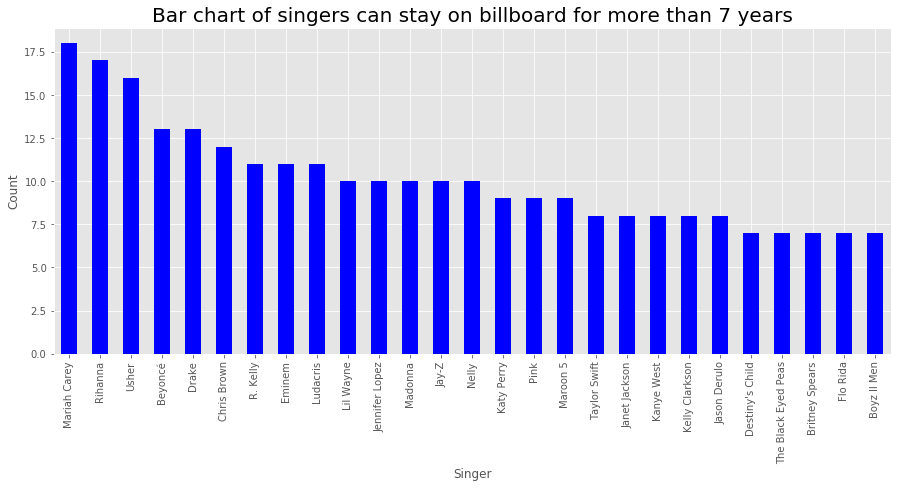

In [270]:
plt.figure(figsize=(15,6))
df_yr['artist'].value_counts().head(27).plot.bar(color='b')
plt.xlabel('Singer')
plt.ylabel('Count')
plt.title('Bar chart of singers can stay on billboard for more than 7 years', fontsize=20)

#### 2.genre
-what are main genre for 1 year

-singers more than 5 times sing what genre

In [467]:
df_g = df.copy()
df_g = df_g[['artist','song','genre','year']].dropna()
df_g.artist = df_g.artist.apply(lambda i: i.split(',')[0])
df_g.genre = df_g.genre.apply(lambda i: i.split(', ,')[0])
df_g.genre = df_g.genre.apply(lambda i: i.split(',')[0].upper())
df_g.head()

,artist,song,genre,year
7,Wilson Phillips,Hold On,POP,1990
8,Paula Abdul,Opposites Attract,DANCE-POP,1990
9,Johnny Gill,Rub You the Right Way,NEW JACK SWING,1990
10,Luther Vandross,Here and Now,R&B,1990
11,Phil Collins,Do You Remember,SOFT ROCK,1990


In [468]:
df_g.genre.value_counts().reset_index().head()

,index,genre
0,R&B,350
1,HIP HOP,261
2,POP,201
3,POP ROCK,115
4,COUNTRY,85


In [469]:
def music_genre(x):
    if ('HOP') in x:
        return 'Hip hop'
    elif ('NEW JACK SWING') in x:
        return 'Hip hop'
    elif ('CRUNK') in x:
        return 'Hip hop'
    elif ('SNAP') in x:
        return 'Hip hop'
    elif 'RAP' in x:
        return 'Hip hop'
    elif ('FREESTYLE' ) in x: 
        return 'R&B and soul'
    elif ('R&B' ) in x: 
        return 'R&B and soul'
    elif 'SOUL' in x:
        return 'R&B and soul'
    elif 'BLUES'in x:
        return 'R&B and soul'
    elif 'FOLK'in x: 
        return 'Folk'
    elif 'JAZZ'in x: 
        return 'Jazz'
    elif 'SKA'in x: 
        return 'Jazz'
    elif 'POP'in x: 
        return 'Pop'
    elif 'COUNTRY'in x: 
        return 'Country'
    elif ('ROCK')in x: 
        return 'Rock'
    elif 'METAL'in x: 
        return 'Rock'
    elif 'POST-GRUNGE'in x: 
        return 'Rock'
    elif("EURODANCE")in x:
        return'Electronic'
    elif('DISCO')in x:
        return'Electronic'
    elif('ELECTRO' )in x:
        return'Electronic'
    elif('DANCEHALL' )in x:
        return'Electronic'
    elif('DANCEHALL' )in x:
        return'Electronic'
    elif('BREAKFAST' )in x:
        return'Electronic'
    elif('EDM' )in x:
        return'Electronic'
    elif('HARDSTYLE' )in x:
        return'Electronic'
    elif('HOUSE' )in x:
        return'Electronic'
    elif('TECHNO' )in x:
        return'Electronic'
    elif('TRANCE' )in x:
        return'Electronic'
    elif('DANCE' )in x:
        return'Electronic'
    elif('FUNK' )in x:
        return'Electronic'
    elif('REGGAE' )in x:
        return'Electronic'
    else:
        return x

In [470]:
df_g['genres'] = df_g['genre'].apply(music_genre)
# df_g['genres'] = df_g['genre'].apply(lambda x:'R&B' if 'R&B' in x else '')
df_g.genres.value_counts()

Pop                    549
Hip hop                463
R&B and soul           413
Rock                   191
Electronic             161
Country                 88
Folk                    20
Jazz                     4
CCM                      3
DOO-WOP                  3
HI-NRG                   2
NEW-AGE                  2
WORLDBEAT                2
NEW WAVE                 2
MIAMI BASS               2
LATIN                    2
UK GARAGE                2
GRUNGE                   2
AMERICANA                1
A CAPPELLA               1
CELTIC                   1
CLUB                     1
QUIET STORM              1
BACHATA                  1
ACOUSTIC                 1
URBAN GOSPEL             1
TORCH SONG               1
HORRORCORE               1
BALLAD                   1
INDUSTRIAL               1
SOCA                     1
FILM SCORE               1
PSYCHEDELIC              1
TANGO                    1
MAMBO                    1
NEW AGE                  1
FUTURE BASS              1
C

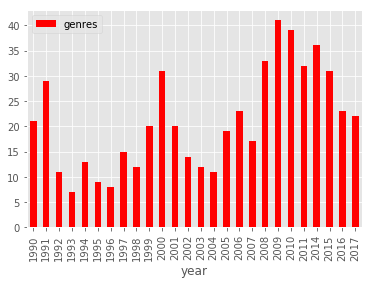

In [444]:
df_g[df_g.genres == 'Pop'].groupby('year')['genres'].count().reset_index().plot(kind='bar',x='year',y='genres', color='r')

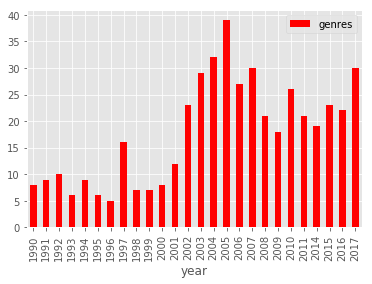

In [445]:
df_g[df_g.genres == 'Hip hop'].groupby('year')['genres'].count().reset_index().plot(kind='bar',x='year',y='genres', color='r')

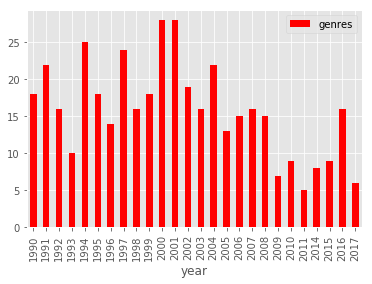

In [446]:
df_g[df_g.genres == 'R&B and soul'].groupby('year')['genres'].count().reset_index().plot(kind='bar',x='year',y='genres', color='r')

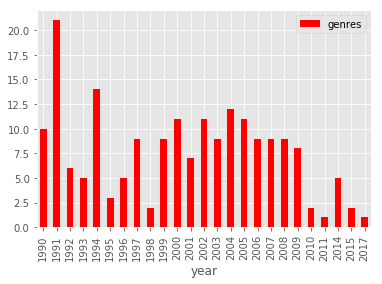

In [447]:
df_g[df_g.genres == 'Rock'].groupby('year')['genres'].count().reset_index().plot(kind='bar',x='year',y='genres', color='r')

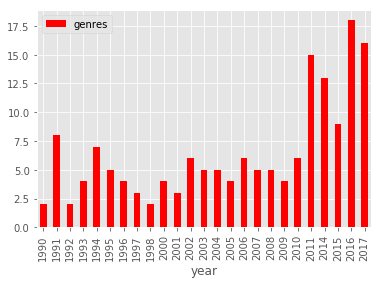

In [448]:
df_g[df_g.genres == 'Electronic'].groupby('year')['genres'].count().reset_index().plot(kind='bar',x='year',y='genres', color='r')

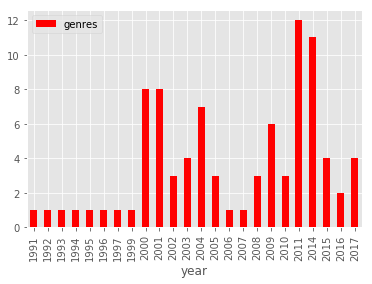

In [449]:
df_g[df_g.genres == 'Country'].groupby('year')['genres'].count().reset_index().plot(kind='bar',x='year',y='genres', color='r')

In [538]:
(df_g.groupby(['artist','year']).count()).head(10)

song  genre  genres
artist  year                     
'N Sync 1998     1      1       1
        1999     1      1       1
        2000     1      1       1
        2001     1      1       1
        2002     2      2       2
10      1994     1      1       1
112     1996     1      1       1
        1997     1      1       1
        1999     1      1       1
        2001     2      2       2

1 time

In [520]:
df_g0 = df_g.groupby('artist').count()
df_g0.head()

,song,genre,year,genres
artist,,,,
'N Sync,6,6,6,6
10,1,1,1,1
112,6,6,6,6
2 Pistols,1,1,1,1
21 Savage,1,1,1,1


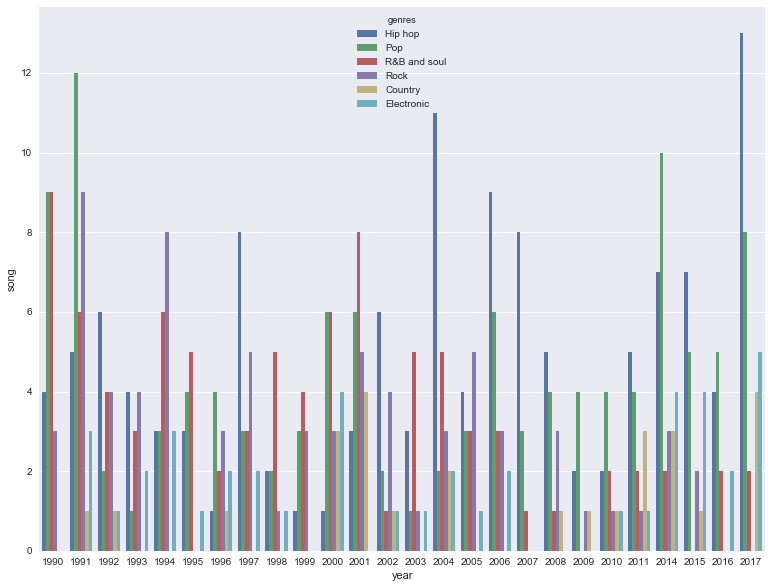

In [529]:
# the artist only appaer on billboard once
df_g1 = df_g0[df_g0.year == 1].reset_index()
df_g1 =pd.merge(df_g,df_g1.drop(['genres','song','genre','year'],axis =1),on='artist')
genres = ['Hip hop','Pop','R&B and soul','Rock','Electronic','Country']
df_g1 = df_g1.groupby(['year','genres']).count().reset_index()
df_g1 = df_g1[df_g1.genres.isin(genres)]
df_g1.head()
sns.barplot(x = 'year', y= 'song', hue='genres',data = df_g1)
sns.set(rc={'figure.figsize':(13,11)})

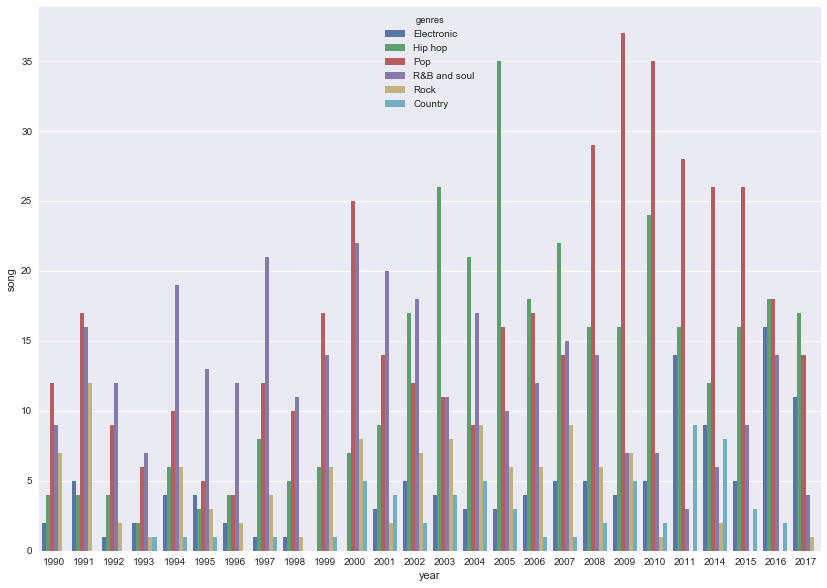

In [527]:
# the artist appaer on billboard more than once
df_g2 = df_g0[df_g0.year >= 2].reset_index()
df_g2 =pd.merge(df_g,df_g2.drop(['genres','song','genre','year'],axis =1),on='artist')
genres = ['Hip hop','Pop','R&B and soul','Rock','Electronic','Country']
df_g2 = df_g2.groupby(['year','genres']).count().reset_index()
df_g2 = df_g2[df_g2.genres.isin(genres)]
sns.barplot(x = 'year', y= 'song', hue='genres',data = df_g2)
sns.set(rc={'figure.figsize':(13,10)})

#### 3.song writer

In [298]:
df_sw = df.copy()
df_sw = df_sw[['artist','song','songwriter','year']].dropna()
df_sw.artist = df_sw.artist.apply(lambda i: i.split(',')[0])
df_sw.songwriter = df_sw.songwriter.map(lambda i: i.split(',')[0])

In [299]:
import seaborn as sns
df_sw['selfwrite'] = df_sw.songwriter == df_sw.artist
df_sw = df_sw.groupby('year')['selfwrite'].agg(np.sum)
df_sw = df_sw.reset_index()

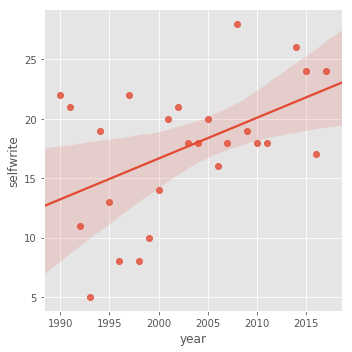

In [301]:
sns.lmplot("year", "selfwrite", df_sw)